# **Kaggle study**
Forecast use of a city bikeshare system

**Data Fields**
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather  
    1: Clear, Few clouds, Partly cloudy, Partly cloudy  
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
    
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

# **Evaluation**
submissions are evaluated one the Root Mean Squared Logarithmic Error(RMSLE)  
- 분류와 회구중 회귀와 관련된 문제 -> 자전거 대여량을 예측하는 문제  
- 대여량과 같은 결과값이 제시되어 있는 지도학습

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib as mpl  
import matplotlib.pyplot as plt  
import seaborn as sns  
from scipy import stats

#  노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 아래 주석 3개 추후 공부하여 정리하기

In [2]:
# 훈련 데이터 불러오기 및 행열 수 체크
train = pd.read_csv("C:/Users/user/Github/train.csv", parse_dates=["datetime"])
train.shape

(10886, 12)

In [3]:
# 열 이름 체크
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
# 데이터 형식 체크
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
# 열 이름 및 데이터 형식 체크
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [6]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.temp.describe()

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [8]:
# windspped 값 체크
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [9]:
# null 값 체크
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

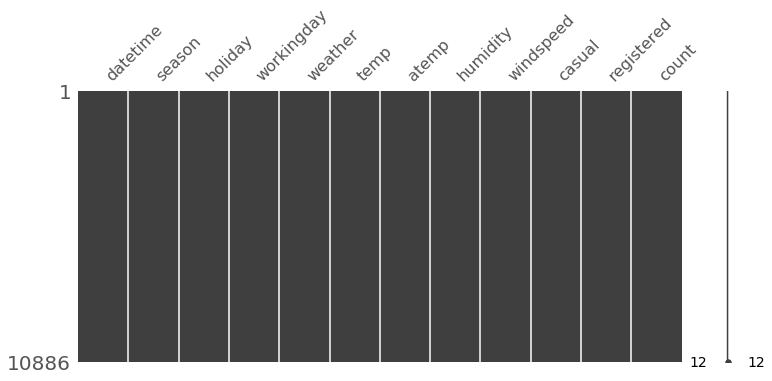

In [10]:
# pip install missingno 내장 모튤 아니므로 cmd창에서 인스톨
## figsize = (가로,세로)
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [11]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [3]:
# 그래프에서 한글 표현을 위해 폰트 설치

# 폰트 설정 방법 1
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/나눔고딕.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

['NanumGothic']


In [ ]:
# seaborn 모듈은 시각화 패키지
# ax는 그래프 보여지는 순서

figure, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x="year",y="count",ax=ax1)
sns.barplot(data=train, x="month",y="count",ax=ax2)
sns.barplot(data=train, x="day",y="count",ax=ax3)
sns.barplot(data=train, x="hour",y="count",ax=ax4)
sns.barplot(data=train, x="minute",y="count",ax=ax5)
sns.barplot(data=train, x="second",y="count",ax=ax6)

ax1.set(ylabel = "Count", title = "연도별 대여량")
ax2.set(xlabel = "Count", title = "월별 대여량")
ax3.set(xlabel = "Count", title = "일별 대여량")
ax4.set(xlabel = "Count", title = "시간별 대여량")
ax5.set(ylabel = "Count", title = "분별 대여량")
ax6.set(ylabel = "Count", title = "초별 대여량")

- 연도별 대여량은 2011년에 비해 2012년에 더 많다
- 월별 대여량은 6월에 가장 많고 1월에 가장 적으며 6~10월 대여량이 많다. 날씨가 따뜻할 수록 대여량이 증가한다
- 일별 대여량은 1일부터 19일까지의 데이터이므로 피처로 사용하기에 부적합하다.
- 시간별 대여량은 17시에 가장 많고 4시에 가장 적다. 출퇴근 시간에 대여량이 증가한다.
- 분,초 데이터는 모두 0이므로 사용할 수 없다.
- **일별 데이터는 주말과 평일로 나누어 볼 필요가 있다.**

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

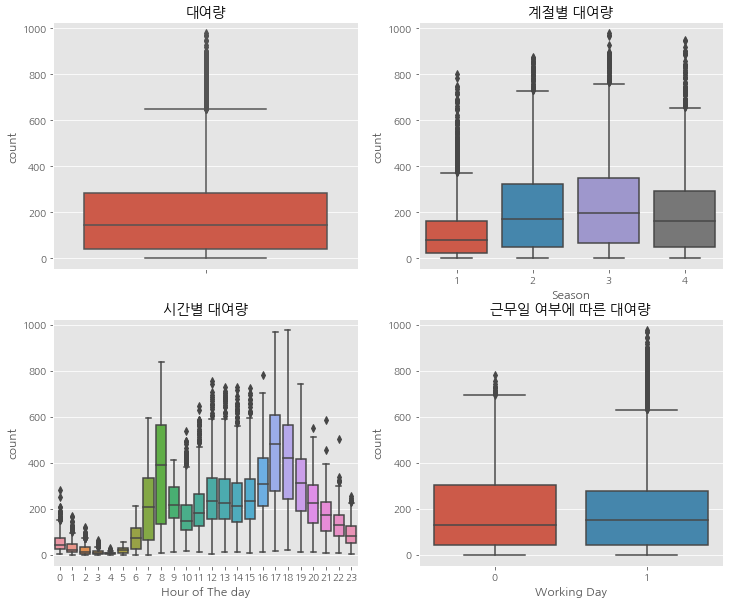

In [15]:
# 그래프 그릴땐 항상 fig 수와 사이즈를 먼저 선언
# 데이터 지정 및 그래프 위치 설정 후 그래프 편집
# orient는 "h","v"로 구분

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,10)

sns.boxplot(data=train, y="count",orient='v',ax=axes[0][0])
sns.boxplot(data=train, y="count", x="season", orient='v', ax=axes[0][1])
sns.boxplot(data=train, y="count", x="hour", orient='v', ax=axes[1][0])
sns.boxplot(data=train, y="count", x="workingday", orient='v', ax=axes[1][1])

axes[0][0].set(ylabel="count", title = "대여량")
axes[0][1].set(ylabel="count", xlabel = "Season", title = "계절별 대여량")
axes[1][0].set(ylabel="count", xlabel = "Hour of The day", title = "시간별 대여량")
axes[1][1].set(ylabel="count", xlabel = "Working Day", title = "근무일 여부에 따른 대여량")

In [16]:
# prase_date[] 로 불렀다면, dayofweek 매소드 사용하여 구분가능
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [17]:
# 1 -> 일요일
train["dayofweek"].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

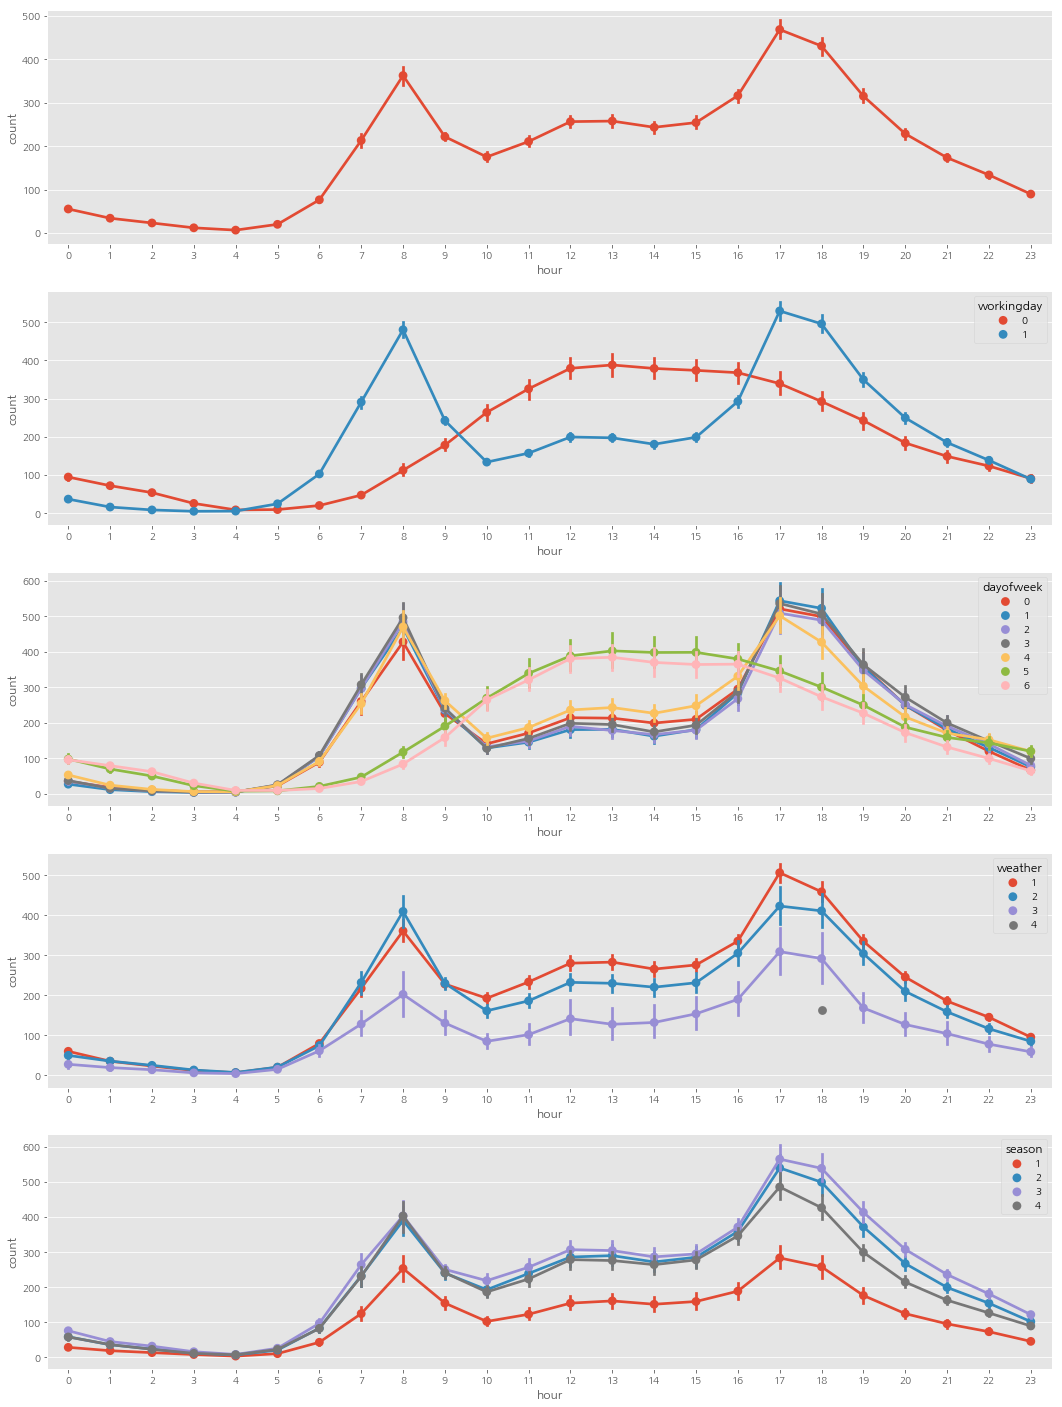

In [18]:
# hue -> 카테고리 변수
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x="hour", y="count", ax=ax1)
sns.pointplot(data=train, x="hour", y="count", hue = "workingday", ax=ax2)
sns.pointplot(data=train, x="hour", y="count", hue = "dayofweek", ax=ax3)
sns.pointplot(data=train, x="hour", y="count", hue = "weather", ax=ax4)
sns.pointplot(data=train, x="hour", y="count", hue = "season", ax=ax5)

In [19]:
# 상관관계 분석
corrMatt = train[["temp","atemp","casual","registered","humidity","windspeed","count" ]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


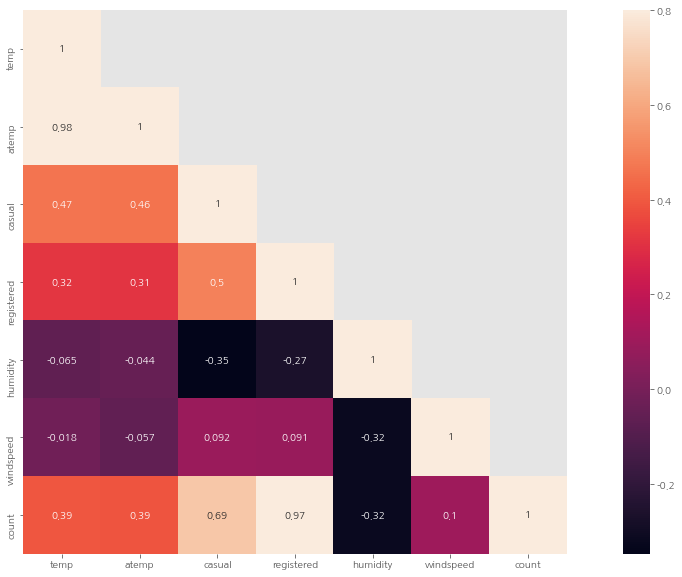

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

- 온도,습도,풍속은 상관관계가 거의 없다.
- 대여량과 가장 연관이 높은 건 등록된 대여자이지만, 이는 test 데이터에 존재하지 않으므로 피처로 적합하지 않다.
- temp와 atemp가 0.98로 상관관계가 높지만 온도와 체감온도로 피처에 사용하기에 적합하지 않다.

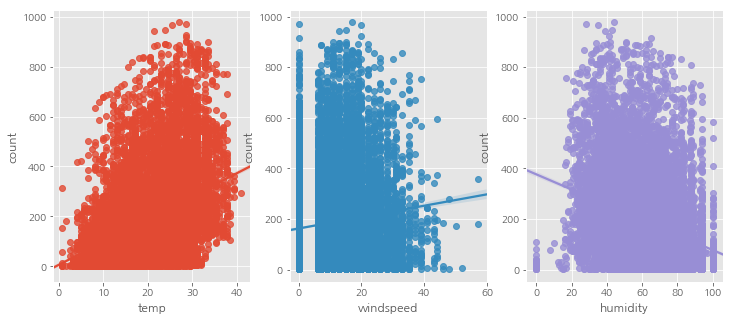

In [21]:
# 온도별, 바람별, 습도별 대여량 regplot으로 그려라
# regplot은 선형회귀 적합선을 포함한 산점도

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

sns.regplot(data = train, x = "temp", y = "count", ax = ax1)
sns.regplot(data = train, x = "windspeed", y = "count", ax = ax2)
sns.regplot(data = train, x = "humidity", y = "count", ax = ax3)

- 풍속의 경우 0에 몰려있는 경우가 많아 보인다. 관측되지 않은 값에 대해 조정이 필요해보인다.

In [22]:
# 함수로 정의하여 연월 합치기

def concatenate_year_month(datetime) :
    return "{0} - {1}".format(datetime.year,datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011 - 1
1,2011-01-01 01:00:00,2011 - 1
2,2011-01-01 02:00:00,2011 - 1
3,2011-01-01 03:00:00,2011 - 1
4,2011-01-01 04:00:00,2011 - 1


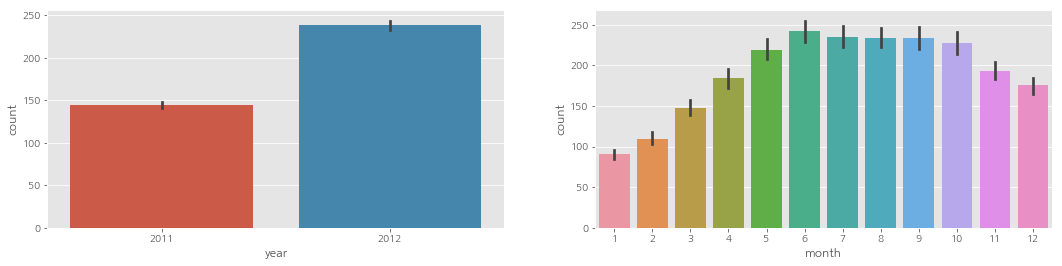

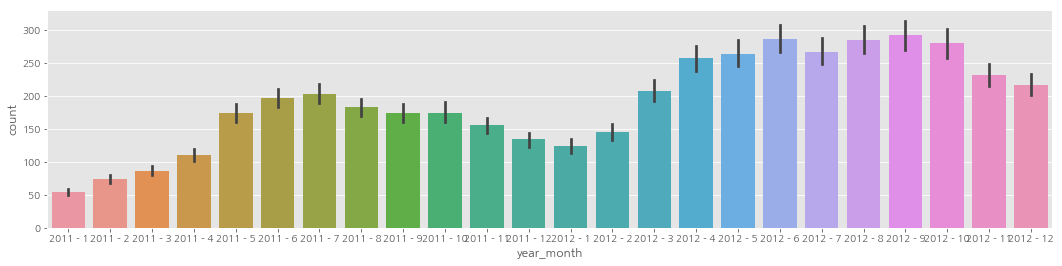

In [23]:
# 2011~2012년 동안 월별 대여량

fig, (ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
fig, ax3 = plt.subplots(nrows=1, ncols=1)

fig.set_size_inches(18,4)
sns.barplot(data = train, x = "year_month", y = "count")

- 2011년보다 2012년 대여량이 더 많다
- 겨울보다 여름에 대여량이 많다

# 아웃라이어 제거


(10886, 20)
(10739, 20)


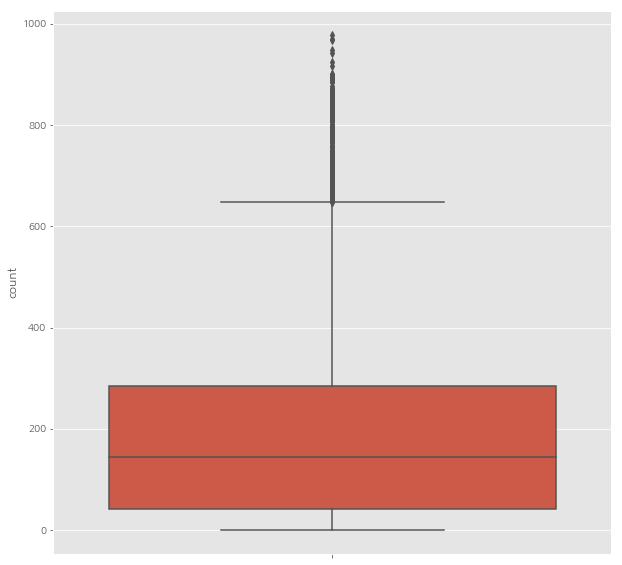

In [24]:
# 박스플롯으로 아웃라이어 체크
fig, axes = plt.subplots()
fig.set_size_inches(10,10)
sns.boxplot(data=train, y="count",orient='v',ax=axes)

# trainWithoutOutliers 
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]      

print(train.shape)
print(trainWithoutOutliers.shape)

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

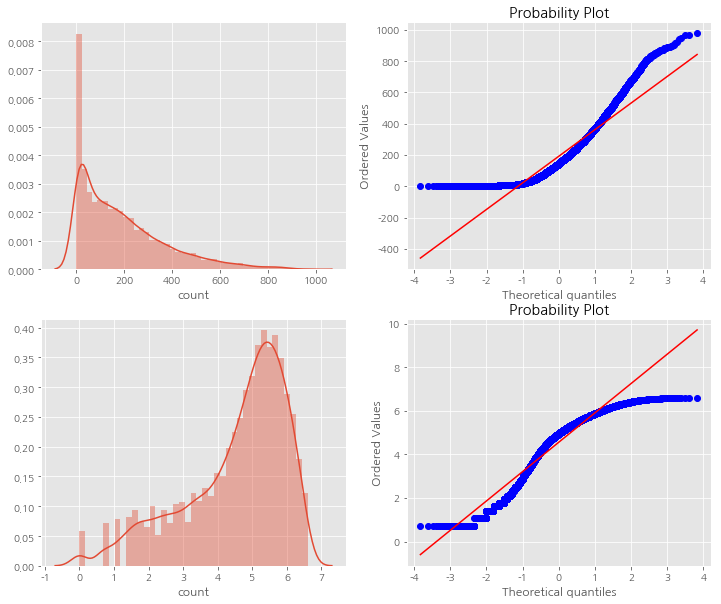

In [36]:
# count값의 데이터 분포도를 파악
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train['count'], dist = 'norm', fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = "norm", fit = True, plot = axes[1][1])